# 빈도분석

In [5]:
# 'trumph_sppech.txt'
# 'moon_speech.txt'

* 한글 문서 => 형태소 분석기 => 형태소(가장 작은 단위의 의미) 추출
* 영어 문서 => tokenizer => token

In [1]:
import pandas as pd
import nltk 
from nltk.stem.porter import PorterStemmer  # 단어를 원형으로 만들어주는 함수
from nltk.tokenize import RegexpTokenizer # 정규표현식을 통한 토큰화 함수
from nltk.corpus import stopwords # 

In [2]:
f = open('./data/trump_speech.txt','r',encoding='utf-8')
lines = f.read()
f.close()

In [3]:
print(lines)

﻿One year ago, I stood before you for the first time in this grand hall. I addressed the threats facing our world, and I presented a vision to achieve a brighter future for all of humanity.

Today, I stand before the United Nations General Assembly to share the extraordinary progress we’ve made.

In less than two years, my administration has accomplished more than almost any administration in the history of our country.

America’s -- so true. [Laughter] Didn’t expect that reaction, but that’s okay. [Laughter and applause.]

America’s economy is booming like never before. Since my election, we’ve added $10 trillion in wealth. The stock market is at an all-time high in history, and jobless claims are at a 50-year low. African American, Hispanic American, and Asian American unemployment have all achieved their lowest levels ever recorded. We’ve added more than 4 million new jobs, including half a million manufacturing jobs.

POLITICO Playbook newsletter
Sign up today to receive the #1-rat

In [4]:
tokenizer = RegexpTokenizer('[\w]+')

In [5]:
# 대소문자 통일
words = lines.lower()

In [6]:
# 토큰 단위로 구분( 한글은 형태소 단위로 구분)
tokens = tokenizer.tokenize(words)
tokens

['one',
 'year',
 'ago',
 'i',
 'stood',
 'before',
 'you',
 'for',
 'the',
 'first',
 'time',
 'in',
 'this',
 'grand',
 'hall',
 'i',
 'addressed',
 'the',
 'threats',
 'facing',
 'our',
 'world',
 'and',
 'i',
 'presented',
 'a',
 'vision',
 'to',
 'achieve',
 'a',
 'brighter',
 'future',
 'for',
 'all',
 'of',
 'humanity',
 'today',
 'i',
 'stand',
 'before',
 'the',
 'united',
 'nations',
 'general',
 'assembly',
 'to',
 'share',
 'the',
 'extraordinary',
 'progress',
 'we',
 've',
 'made',
 'in',
 'less',
 'than',
 'two',
 'years',
 'my',
 'administration',
 'has',
 'accomplished',
 'more',
 'than',
 'almost',
 'any',
 'administration',
 'in',
 'the',
 'history',
 'of',
 'our',
 'country',
 'america',
 's',
 'so',
 'true',
 'laughter',
 'didn',
 't',
 'expect',
 'that',
 'reaction',
 'but',
 'that',
 's',
 'okay',
 'laughter',
 'and',
 'applause',
 'america',
 's',
 'economy',
 'is',
 'booming',
 'like',
 'never',
 'before',
 'since',
 'my',
 'election',
 'we',
 've',
 'added',
 

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# 불용어 : 전체 문맥에서 의미를 갖지 않는 토큰(형태소)

stop_words = stopwords.words('english') # 필요할 때 다운받아서 사용
stopped_tokens = [i for i in list(tokens) if not i in stop_words]

In [10]:
stoppend_tokens1 = [i for i in stopped_tokens if len(i) >1]

In [11]:
word_count = pd.Series(stoppend_tokens1).value_counts()
word_count.head(10)

nations      31
united       29
states       25
people       22
countries    20
world        20
us           17
america      16
new          14
iran         12
dtype: int64

<AxesSubplot:>

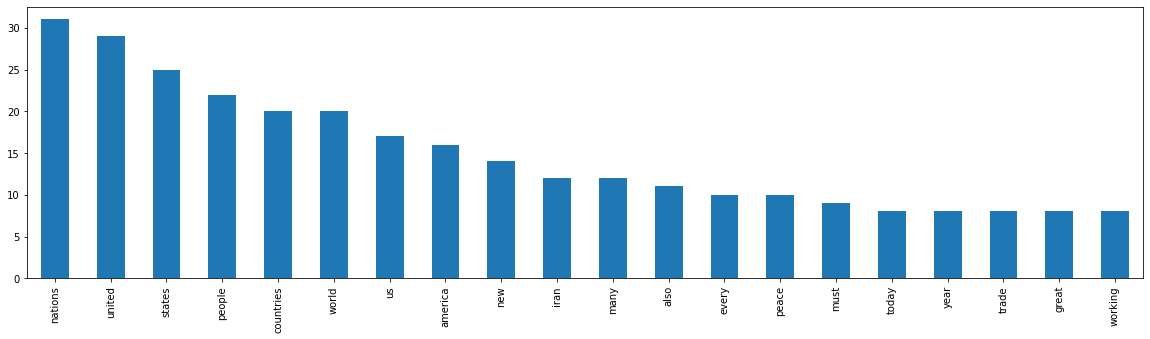

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
word_count[:20].plot(kind= 'bar')

In [23]:
import wordcloud

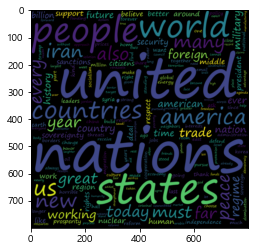

In [30]:
from wordcloud import WordCloud
from collections import Counter
font_path = 'C:\Windows\Fonts\segoepr.ttf'

wordcloud = WordCloud(
font_path = font_path,
width= 800,
height= 800,
background_color = 'black')

count = Counter(stoppend_tokens1) #딕셔너리 형태 단어 , 단어빈도수

wordcloud = wordcloud.generate_from_frequencies(count)

def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

array = wordcloud.to_array()

plt.imshow(array, interpolation= 'bilinear')
plt.show()

In [15]:
from konlpy.tag import Hannanum
han = Hannanum()

In [17]:
f = open('data/moon_speech.txt', 'r', encoding='utf-8')
lines = f.read()
print(lines)

﻿존경하고 사랑하는 국민여러분 감사합니다.

국민여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다.

저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫 걸음을 내딛습니다.

지금 제 두 어깨는 국민여러분으로부터 부여받은 막중한 소명감으로 무겁습니다.

지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다.

그리고 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득차있습니다.



우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 

우리의 선대들이 일관되게 추구했던 나라입니다.

많은 희생과 헌신을 감내하며 젊은이들이 그토록 이루고싶었던 나라입니다.

그런 대한민국을 만들기 위해 저는 역사와 국민앞에 두렵지만 겸허한 마음으로

대한민국 제 19대 대통령으로서의 소명을 다할것을 천명합니다.



함께 선거를 치른 후보들께 감사와 심심한 위로를 드립니다.

이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야할 동반자입니다.

치열했던 경쟁 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야할 것입니다.



존경하는 국민여러분 지난 몇달 우리는 유례없는 정치없는 격변기를 보냈습니다.

정치는 혼란스러웠지만 국민은 위대했습니다.

현직대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다.

국민들은 좌절하지 않고 오히려 이를 전화위복의 기회로 승화시켜 마침내 오늘 새로운 세상을 열었습니다.



대한민국의 위대함은 국민의 위대함입니다.

이번 대선에서 국민들은 또하나의 역사를 만들어주셨습니다.

전국 각지서 골고른 지지로 새로운 대통령 선택해주셨습니다.

오늘부터 저는 국민 모두의 대통령이 되겠습니다.

저를 지지하지 않았던 국민 한분한분도 저의 국민이고 우리의 국민으로 섬기겠습니다.

저는 감히 약속드립니다.

2017년 5월 10일 이날은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다.



존경하고 사랑하는 국민여러분 힘들었던 지난 세

In [18]:
words = han.nouns(lines)
print(words)

['\ufeff존경하', '사랑', '국민여러분', '감사', '국민여러분', '위대한', '선택', '머리', '저', '오늘', '대한민국', '저', '19대', '대통령', '대한민국', '첫', '저', '두', '어깨', '국민여러분으로부터', '부', '막중', '소명감', '저', '가슴', '한번', '경험', '나라', '열정', '저', '머리', '통합', '공존', '세상', '청사진', '우리', '대한민국', '좌절', '패배', '불구', '우리', '선대들', '일관', '추구', '나라', '희생', '헌신', '감내', '젊은이들', '나라', '대한민국', '저', '역사', '국민앞', '겸허한', '마음', '대한민국', '저', '19대', '대통령', '소명', '것', '천명', '선거', '후보들', '감사', '심심', '위로', '이번', '선거', '승자', '패자', '우리', '대한민국', '동반자', '치열', '경쟁', '순간', '뒤', '손', '앞', '전진', '것', '존경', '국민여러분', '몇달', '우리', '정치', '격변기', '정치', '혼란', '국민', '위대', '현직대통령', '탄핵', '구속', '앞', '국민들', '대한민국', '앞길', '국민들', '좌절', '이', '전화위복', '기회', '승화', '오늘', '세상', '대한민국', '위대함', '국민', '위대함', '이번', '대선', '국민들', '또하나', '역사', '전국', '각지', '골고른', '지지', '대통령', '선택', '오늘', '저', '국민', '모두', '대통령', '저', '국민', '한분한분', '저', '국민', '우리', '국민', '저', '약속드', '2017년', '5월', '10', '이날', '진정한', '국민통합', '시작', '날', '역사', '기록', '것', '존경', '사랑', '국민여러분', '세월', '국민들', '이', '나라', '대통령', '문재인'

In [19]:
word_count = pd.Series(words).value_counts()
word_count

대통령     26
저       16
국민      12
것       10
대한민국    10
        ..
시장       1
시민들      1
격의       1
때        1
신명       1
Length: 284, dtype: int64

In [21]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot:>

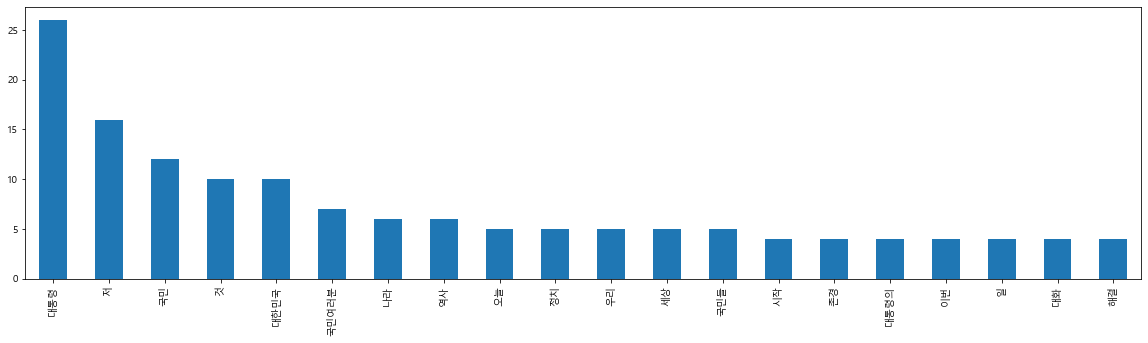

In [22]:
 import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
word_count[:20].plot(kind= 'bar')